In [1]:
!pip install mglearn pandas numpy matplotlib cycler

You should consider upgrading via the 'C:\Users\override\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


1 - Leemos los datos del archivo .csv

In [2]:
import pandas as pd

clients_dataframe = pd.read_csv("resources/Cliente.csv")

##### PROCESADO DE DATOS #######

In [3]:
#Chequeamos los tipos de los datos
clients_dataframe.info()

#Chequeamos que tan unicos son los valores dentro de una columna ya que si son solo 1 los eliminamos
for col in clients_dataframe.columns:
    print(col, clients_dataframe[col].nunique(), len(clients_dataframe))

clients_dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
 # Borramos porque es único para cada uno
clients_dataframe.drop(['customerID'], axis=1, inplace=True)

In [5]:
#Obtenemos la proporcionalidad de las variables para ver si tenemos casos únicos (a limpiar) de nuestro espacio muestral
for var in clients_dataframe.columns:
    print(var, '\n', clients_dataframe[var].value_counts()/len(clients_dataframe))

gender 
 Male      0.504756
Female    0.495244
Name: gender, dtype: float64
SeniorCitizen 
 0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
Partner 
 No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
Dependents 
 No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
tenure 
 1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
PhoneService 
 Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
MultipleLines 
 No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
InternetService 
 Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
OnlineSecurity 
 No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecur

In [6]:
import numpy as np
# Convertimos cada valor de cada columna a numerico

#Convertimos TotalCharges a float ya que es la suma de los monthly charges
clients_dataframe['TotalCharges'] = pd.to_numeric(clients_dataframe['TotalCharges'], errors='coerce')

#Limpiamos los falores inifnitos y no infinitos por NaN
clients_dataframe['TotalCharges'].replace([np.inf, -np.inf], np.nan, inplace=True)

#Llenamos los valores NaN con la media para evitar no sumar al desvío
clients_dataframe.fillna(clients_dataframe['TotalCharges'].mean(), inplace=True)

print("Valores NaN", np.any(np.isnan(clients_dataframe['TotalCharges'])))
print("Valores finitos", np.any(np.isfinite(clients_dataframe['TotalCharges'])))

#Borramos cualquier NaN restante
clients_dataframe.dropna()


Valores NaN False
Valores finitos True


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


2 - Queremos saber si el cliente se dio de baja o no (Es decir el atributo churn).  Por ende ese sera nuestro "y". Partiremos nuestro modelo en distintos sets de entrenamiento

In [7]:
from sklearn.model_selection import train_test_split

#Como el target value es churn, lo borramos del dataset X, y lo uhicamos como target value en Y
X = clients_dataframe.drop('Churn', axis=1)
Y = clients_dataframe['Churn']


Dividimos variables categoricas entre variables numericas

In [8]:

#Separamos features categoricas de las numericas para darles un tratamiento distinto
features_categoricas = []
features_numericas = []
for key in X.keys():
    #Las features del tipo objeto, asumimos que son categoricas, el resto podemos decir que son numericas
    if X[key].dtype == object: 
        features_categoricas.append(key)
    else:
        features_numericas.append(key)

print("features numericas:", features_numericas)

print("features categoricas:", features_categoricas)


features numericas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
features categoricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [9]:
from sklearn.compose import make_column_selector as selector

#Utilizamos el selector de SKLEARN, los que son del tipo objeto, asumimos que son strings o variables categoricas
selector_columnas_numericas = selector(dtype_exclude=object)
selector_columnas_categoricas = selector(dtype_include=object)

#Ajustamos el sleectoer de columnas al dataset
columnas_numericas = selector_columnas_numericas(X)
columnas_categoricas = selector_columnas_categoricas(X)

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Usamos onehotencoder ya que es el recomendado por sklearn y handle unknown ignore, para evitar valores no esperados
preprocesador_categoricas = OneHotEncoder(handle_unknown="ignore")
#Usamos el standard scaler para escalar los datos numericos que tengamos
preprocesador_numerico = StandardScaler()

In [11]:
from sklearn.compose import ColumnTransformer

#Creamos el preprocesador para unir las columnas
preprocesador = ColumnTransformer([
    ('one-hot-encoder', preprocesador_categoricas, columnas_categoricas),
    ('standard-scaler', preprocesador_numerico, columnas_numericas)])


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5634, 19)
(1409, 19)


3 - Probaremos distintos modelos para saber cual es el mejor

In [13]:
from sklearn.model_selection import validation_curve

from sklearn.model_selection import learning_curve
import numpy as np
from matplotlib import pyplot as plt

# Funcion utilitaria para graficar curvas de aprendizaje
def curva_de_aprendizaje(modelo, x, y, cv):
    #CV es el Cross validation, elegimos 5 ya que es bastante ligero para correr en unos segundos
    train_sizes, train_scores, test_scores = learning_curve(modelo, x, y, 
                                                                cv=cv,train_sizes=np.linspace(0.1, 1.0, 10),
                                                                n_jobs=1)
    
    plt.plot(train_sizes,np.mean(train_scores,axis=1))
    plt.plot(train_sizes,np.mean(test_scores,axis=1))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Accuracy de entrenamiento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Accuracy de validacion')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Curva de aprendizaje')
    plt.xlabel('Tamaño de datos de entrenamiento')
    plt.ylabel('Accuracy del modelo')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [14]:
from sklearn.pipeline import make_pipeline

def ejecutar_modelo(clase_modelo):
    modelo = make_pipeline(preprocesador, clase_modelo)
    modelo.fit(X_train, Y_train)

    print("Accuracy del set de entrenamiento: {:.3f}".format(modelo.score(X_train, Y_train)))#
    print("Accuracy del set de testeo: {:.3f}".format(modelo.score(X_test, Y_test)))

    curva_de_aprendizaje(modelo, X_train, Y_train, 5)

3 - Árbol de decisiones 

Accuracy del set de entrenamiento: 0.999
Accuracy del set de testeo: 0.718


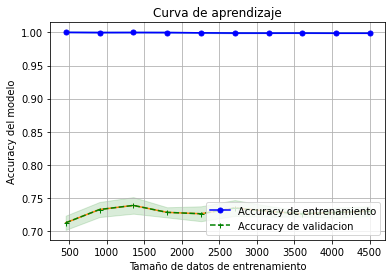

In [15]:
from sklearn.tree import DecisionTreeClassifier

ejecutar_modelo(DecisionTreeClassifier(random_state=0))

3 - - Random forest classifier

Accuracy del set de entrenamiento: 0.999
Accuracy del set de testeo: 0.789


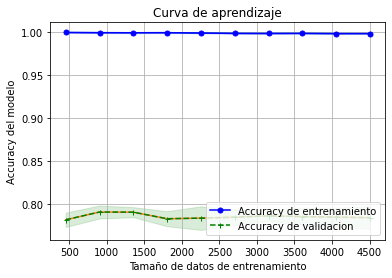

In [16]:
from sklearn.ensemble import RandomForestClassifier 

ejecutar_modelo(RandomForestClassifier(random_state=0))

3 - C - KNN (Con distintos valores de N) 

Número de vecinos cercanos: 1
Accuracy del set de entrenamiento: 0.998
Accuracy del set de testeo: 0.740


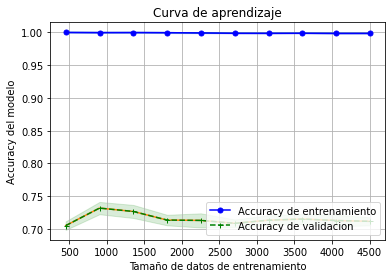

Número de vecinos cercanos: 3
Accuracy del set de entrenamiento: 0.861
Accuracy del set de testeo: 0.769


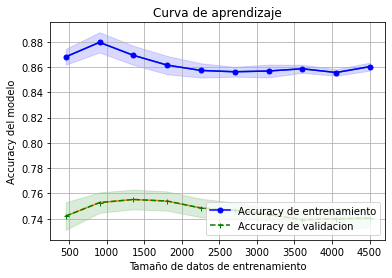

Número de vecinos cercanos: 5
Accuracy del set de entrenamiento: 0.834
Accuracy del set de testeo: 0.775


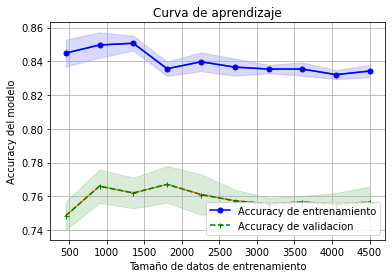

Número de vecinos cercanos: 7
Accuracy del set de entrenamiento: 0.818
Accuracy del set de testeo: 0.774


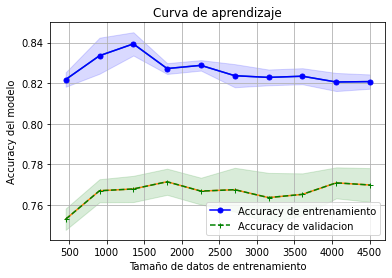

In [17]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(1,8,2):
    print("Número de vecinos cercanos: {n}".format(n=n))
    ejecutar_modelo(KNeighborsClassifier(n_neighbors=n))

3 - D - RIDGE L2 - Para clasificacion (Con distintos valores de alpha) 

Alpha: 0.10
Accuracy del set de entrenamiento: 0.798
Accuracy del set de testeo: 0.823


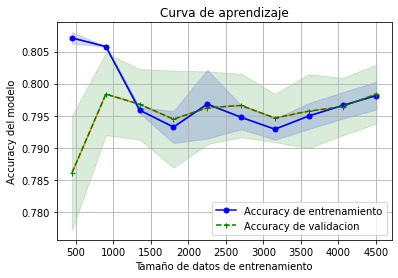

Alpha: 0.50
Accuracy del set de entrenamiento: 0.798
Accuracy del set de testeo: 0.825


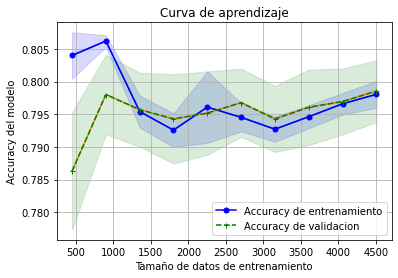

Alpha: 1.00
Accuracy del set de entrenamiento: 0.798
Accuracy del set de testeo: 0.824


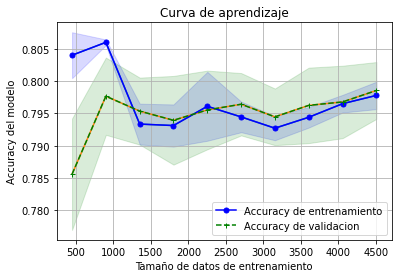

Alpha: 5.00
Accuracy del set de entrenamiento: 0.798
Accuracy del set de testeo: 0.824


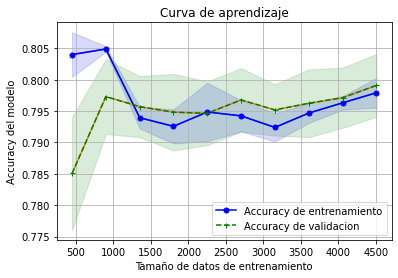

Alpha: 10.00
Accuracy del set de entrenamiento: 0.798
Accuracy del set de testeo: 0.825


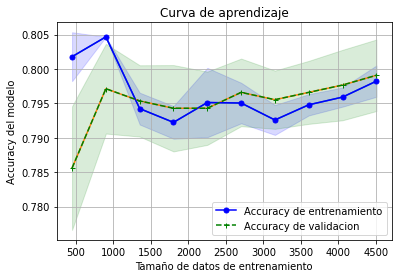

In [18]:
from sklearn.linear_model import RidgeClassifier

for a in [0.1, 0.5, 1, 5, 10]:
    print("Alpha: {:.2f}".format(a))
    ejecutar_modelo(RidgeClassifier(alpha=a))

3 - E - Regression logistica

Accuracy del set de entrenamiento: 0.803
Accuracy del set de testeo: 0.822


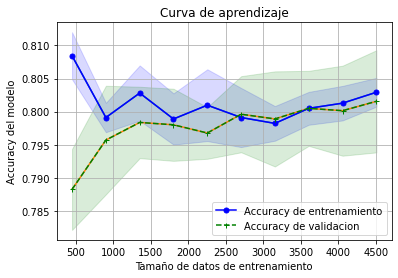

In [19]:
from sklearn.linear_model import LogisticRegression

ejecutar_modelo(LogisticRegression(random_state=0, max_iter=1000))

3 - E - SVM

Accuracy del set de entrenamiento: 0.816
Accuracy del set de testeo: 0.810


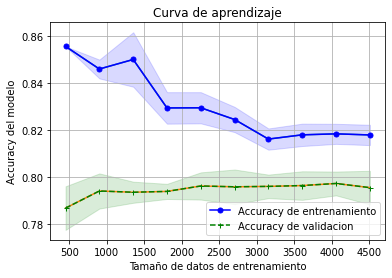

In [20]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

#Importamos SVC por que es SVM aplicado a clasificacion
ejecutar_modelo(SVC(random_state=0))